### Time-Series Forecasting Of Covid-19 Deaths In India (LSTM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('India.csv')

In [3]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active
0,30-01-2020,1,1,0,0,0,0,1
1,31-01-2020,0,1,0,0,0,0,1
2,01-02-2020,0,1,0,0,0,0,1
3,02-02-2020,1,2,0,0,0,0,2
4,03-02-2020,1,3,0,0,0,0,3


In [4]:
df1=df['Total Deceased']

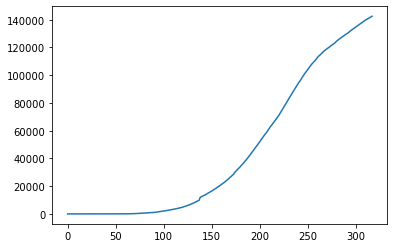

In [5]:
plt.plot(df1)

In [6]:
df1

0           0
1           0
2           0
3           0
4           0
        ...  
313    140807
314    141220
315    141631
316    142073
317    142464
Name: Total Deceased, Length: 318, dtype: int64

### Applying Min-Max Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [7.01931716e-06]
 [7.01931716e-06]
 [1.40386343e-05]
 [1.40386343e-05]
 [1.40386343e-05]
 [2.10579515e-05]
 [2.10579515e-05]
 [2.80772686e-05]
 [2.80772686e-05]
 [2.80772686e-05]
 [4.91352201e-05]
 [6.31738544e-05]
 [7.01931716e-05]
 [7.721248

### Splitting Data into Training And Test

In [9]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(222, 96)

In [11]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


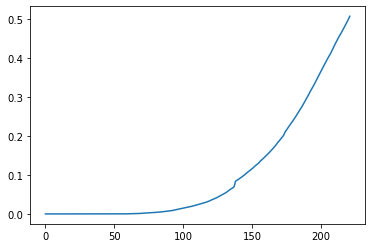

In [12]:
plt.plot(train_data)

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(161, 60)
(161,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(35, 60)
(35,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization


In [19]:
model=Sequential()
model.add(SimpleRNN(128,input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [22]:
import tensorflow

In [23]:
filepath="weights.bestd.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch')


In [24]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1000,batch_size=16,callbacks=checkpoint,verbose=1)

Epoch 1/1000
11/11 [==============================] - 0s 37ms/step - loss: 0.0160 - val_loss: 0.2659
Epoch 2/1000
11/11 [==============================] - 0s 9ms/step - loss: 8.6333e-04 - val_loss: 0.2768
Epoch 3/1000
11/11 [==============================] - 0s 9ms/step - loss: 3.1153e-04 - val_loss: 0.2958
Epoch 4/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.7729e-04 - val_loss: 0.1943
Epoch 5/1000
11/11 [==============================] - 0s 15ms/step - loss: 8.2440e-05 - val_loss: 0.1592
Epoch 6/1000
11/11 [==============================] - 0s 16ms/step - loss: 9.5076e-05 - val_loss: 0.1350
Epoch 7/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.4630e-04 - val_loss: 0.1473
Epoch 8/1000
11/11 [==============================] - 0s 16ms/step - loss: 1.2185e-04 - val_loss: 0.1272
Epoch 9/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.0342e-04 - val_loss: 0.1068
Epoch 10/1000
11/11 [==============================] - 0s 17m

Epoch 155/1000
11/11 [==============================] - 0s 9ms/step - loss: 6.1246e-06 - val_loss: 0.0043
Epoch 156/1000
11/11 [==============================] - 0s 17ms/step - loss: 8.7762e-06 - val_loss: 0.0011
Epoch 157/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.2795e-05 - val_loss: 0.0039
Epoch 158/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.9949e-05 - val_loss: 0.0018
Epoch 159/1000
11/11 [==============================] - 0s 9ms/step - loss: 9.6007e-06 - val_loss: 0.0031
Epoch 160/1000
11/11 [==============================] - 0s 10ms/step - loss: 9.1378e-06 - val_loss: 0.0018
Epoch 161/1000
11/11 [==============================] - 0s 10ms/step - loss: 5.7099e-06 - val_loss: 0.0024
Epoch 162/1000
11/11 [==============================] - 0s 10ms/step - loss: 5.0333e-06 - val_loss: 0.0026
Epoch 163/1000
11/11 [==============================] - 0s 9ms/step - loss: 4.4169e-06 - val_loss: 0.0027
Epoch 164/1000
11/11 [==================

Epoch 231/1000
11/11 [==============================] - 0s 11ms/step - loss: 2.7077e-05 - val_loss: 0.0038
Epoch 232/1000
11/11 [==============================] - 0s 11ms/step - loss: 2.1780e-04 - val_loss: 0.0101
Epoch 233/1000
11/11 [==============================] - 0s 9ms/step - loss: 1.9093e-04 - val_loss: 7.8557e-04
Epoch 234/1000
11/11 [==============================] - 0s 10ms/step - loss: 6.3247e-05 - val_loss: 9.3712e-04
Epoch 235/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.1631e-05 - val_loss: 9.0574e-04
Epoch 236/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.6007e-05 - val_loss: 1.7223e-04
Epoch 237/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.3824e-05 - val_loss: 2.5491e-05
Epoch 238/1000
11/11 [==============================] - 0s 11ms/step - loss: 1.1242e-05 - val_loss: 3.8817e-04
Epoch 239/1000
11/11 [==============================] - 0s 10ms/step - loss: 9.5411e-06 - val_loss: 1.0499e-04
Epoch 240/

Epoch 305/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.7381e-06 - val_loss: 3.0195e-04
Epoch 306/1000
11/11 [==============================] - 0s 10ms/step - loss: 4.0836e-06 - val_loss: 4.6162e-04
Epoch 307/1000
11/11 [==============================] - 0s 10ms/step - loss: 4.6294e-06 - val_loss: 1.6023e-04
Epoch 308/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.1936e-06 - val_loss: 1.4491e-04
Epoch 309/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.3080e-06 - val_loss: 2.7104e-04
Epoch 310/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.3114e-06 - val_loss: 1.2855e-04
Epoch 311/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.1576e-06 - val_loss: 1.1833e-04
Epoch 312/1000
11/11 [==============================] - 0s 11ms/step - loss: 2.9802e-06 - val_loss: 3.3492e-04
Epoch 313/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.2853e-06 - val_loss: 1.2263e-04
E

Epoch 452/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.6563e-05 - val_loss: 0.0021
Epoch 453/1000
11/11 [==============================] - 0s 10ms/step - loss: 5.7155e-05 - val_loss: 0.0011
Epoch 454/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.7390e-05 - val_loss: 8.5161e-05
Epoch 455/1000
11/11 [==============================] - 0s 10ms/step - loss: 6.2652e-06 - val_loss: 1.8826e-04
Epoch 456/1000
11/11 [==============================] - 0s 10ms/step - loss: 4.0602e-06 - val_loss: 3.6925e-05
Epoch 457/1000
11/11 [==============================] - 0s 11ms/step - loss: 5.4680e-06 - val_loss: 1.0076e-04
Epoch 458/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.6285e-06 - val_loss: 3.2224e-05
Epoch 459/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.1770e-06 - val_loss: 6.2859e-06
Epoch 460/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.2749e-06 - val_loss: 1.7296e-05
Epoch 461

11/11 [==============================] - 0s 15ms/step - loss: 2.7027e-06 - val_loss: 7.4893e-07
Epoch 600/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.7856e-06 - val_loss: 5.9663e-06
Epoch 601/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.9313e-06 - val_loss: 1.2049e-06
Epoch 602/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.9097e-06 - val_loss: 1.7779e-05
Epoch 603/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.7418e-06 - val_loss: 1.4014e-05
Epoch 604/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.0262e-06 - val_loss: 2.5565e-05
Epoch 605/1000
11/11 [==============================] - 0s 11ms/step - loss: 2.3274e-06 - val_loss: 9.9409e-05
Epoch 606/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.2394e-06 - val_loss: 1.6174e-04
Epoch 607/1000
11/11 [==============================] - 0s 10ms/step - loss: 5.0661e-06 - val_loss: 3.6233e-06
Epoch 608/1000
1

11/11 [==============================] - 0s 10ms/step - loss: 2.8250e-06 - val_loss: 2.4761e-05
Epoch 748/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.5072e-06 - val_loss: 1.6243e-05
Epoch 749/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.0140e-06 - val_loss: 8.7668e-06
Epoch 750/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.4728e-06 - val_loss: 7.0137e-05
Epoch 751/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.2920e-06 - val_loss: 7.9597e-07
Epoch 752/1000
11/11 [==============================] - 0s 9ms/step - loss: 2.2040e-06 - val_loss: 3.3234e-05
Epoch 753/1000
11/11 [==============================] - 0s 10ms/step - loss: 1.9179e-06 - val_loss: 7.8087e-06
Epoch 754/1000
11/11 [==============================] - 0s 10ms/step - loss: 2.4140e-06 - val_loss: 4.4125e-05
Epoch 755/1000
11/11 [==============================] - 0s 9ms/step - loss: 2.0854e-06 - val_loss: 1.4777e-05
Epoch 756/1000
11/

11/11 [==============================] - 0s 9ms/step - loss: 1.2727e-06 - val_loss: 1.3017e-05
Epoch 896/1000
11/11 [==============================] - 0s 9ms/step - loss: 2.1141e-06 - val_loss: 1.0707e-05
Epoch 897/1000
11/11 [==============================] - 0s 9ms/step - loss: 5.1374e-06 - val_loss: 9.7535e-05
Epoch 898/1000
11/11 [==============================] - 0s 9ms/step - loss: 6.3194e-06 - val_loss: 1.9297e-04
Epoch 899/1000
11/11 [==============================] - 0s 10ms/step - loss: 7.6865e-06 - val_loss: 2.9711e-05
Epoch 900/1000
11/11 [==============================] - 0s 9ms/step - loss: 5.3367e-06 - val_loss: 1.7973e-04
Epoch 901/1000
11/11 [==============================] - 0s 10ms/step - loss: 4.3128e-06 - val_loss: 2.6328e-05
Epoch 902/1000
11/11 [==============================] - 0s 10ms/step - loss: 3.0046e-06 - val_loss: 9.1929e-05
Epoch 903/1000
11/11 [==============================] - 0s 9ms/step - loss: 3.2697e-06 - val_loss: 1.0144e-04
Epoch 904/1000
11/11 [

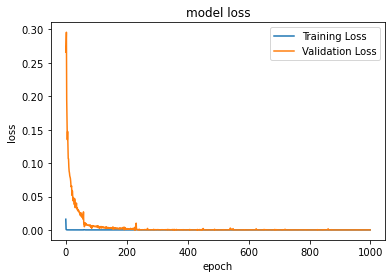

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [21]:
model.load_weights("weights.bestd.hdf5")

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [23]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0011630578507691432

Validation RMSE

In [24]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.0006391437909733571

Validation MEA

In [25]:
mean_absolute_error(ytest,test_predict)

0.0005055569099868817

Training MEA

In [26]:
mean_absolute_error(y_train,train_predict)

0.0005876405218308429

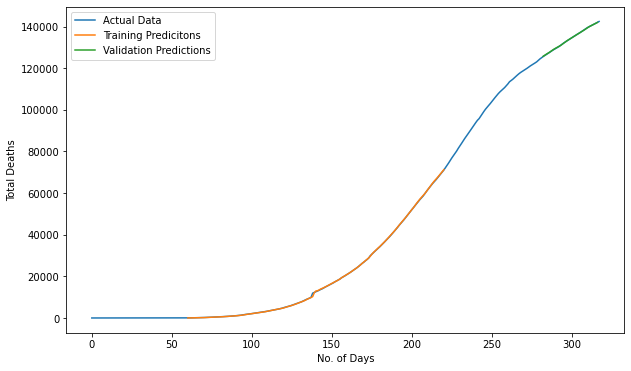

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('Total Deaths')
plt.xlabel('No. of Days')
plt.legend(['Actual Data','Training Predicitons', 'Validation Predictions'])
plt.show()

In [28]:
len(test_data)

96

In [29]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape


(1, 60)

In [30]:
x_input

array([[0.77721389, 0.78340493, 0.78930116, 0.79654509, 0.80063033,
        0.80476471, 0.8097765 , 0.81469705, 0.8195123 , 0.82410995,
        0.82816712, 0.83155745, 0.83496181, 0.83854869, 0.84216363,
        0.84610849, 0.84996912, 0.85326117, 0.85670766, 0.86020328,
        0.86378313, 0.86874579, 0.87346277, 0.87751292, 0.88142268,
        0.88486916, 0.88802785, 0.89161472, 0.89547535, 0.89929386,
        0.90292284, 0.90608154, 0.90912792, 0.91229363, 0.91560675,
        0.91972007, 0.92380531, 0.92776421, 0.93126685, 0.9348467 ,
        0.93822299, 0.94165544, 0.94529144, 0.94873793, 0.95214931,
        0.95562388, 0.95874045, 0.96212376, 0.96564044, 0.9693326 ,
        0.97313005, 0.97671692, 0.98010024, 0.98283777, 0.98554723,
        0.98836899, 0.99126797, 0.99415291, 0.99725545, 1.        ]])

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.7772138926325247,
 0.7834049303683738,
 0.7893011567834681,
 0.7965450920934412,
 0.8006303346810423,
 0.8047647124887691,
 0.8097765049415994,
 0.8146970462713388,
 0.8195122978436659,
 0.8241099505840073,
 0.828167115902965,
 0.8315574460916443,
 0.8349618149146452,
 0.8385486859838276,
 0.8421636343216532,
 0.8461084905660378,
 0.8499691150044925,
 0.8532611747529201,
 0.8567076594788859,
 0.8602032794249775,
 0.8637831311769991,
 0.8687457884097035,
 0.873462769541779,
 0.877512915543576,
 0.8814226752021563,
 0.8848691599281222,
 0.8880278526504942,
 0.8916147237196766,
 0.8954753481581312,
 0.8992938566936209,
 0.9029228436657682,
 0.9060815363881403,
 0.909127920035939,
 0.9122936320754718,
 0.9156067497753819,
 0.9197200696316263,
 0.9238053122192273,
 0.9277642070979336,
 0.9312668463611861,
 0.9348466981132076,
 0.9382229896675652,
 0.9416554357592094,
 0.9452914420485176,
 0.9487379267744834,
 0.9521493149146452,
 0.9556238769092543,
 0.9587404537286613,
 0.96212376460017

In [33]:
from numpy import array
nextpredicted=60#predicting for next 60 days
lst_output=[]
n_steps=time_step
i=0
while(i<nextpredicted):
    
    if(len(temp_input)>n_steps):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0024092]
61
1 day input [0.78340493 0.78930116 0.79654509 0.80063033 0.80476471 0.8097765
 0.81469705 0.8195123  0.82410995 0.82816712 0.83155745 0.83496181
 0.83854869 0.84216363 0.84610849 0.84996912 0.85326117 0.85670766
 0.86020328 0.86378313 0.86874579 0.87346277 0.87751292 0.88142268
 0.88486916 0.88802785 0.89161472 0.89547535 0.89929386 0.90292284
 0.90608154 0.90912792 0.91229363 0.91560675 0.91972007 0.92380531
 0.92776421 0.93126685 0.9348467  0.93822299 0.94165544 0.94529144
 0.94873793 0.95214931 0.95562388 0.95874045 0.96212376 0.96564044
 0.9693326  0.97313005 0.97671692 0.98010024 0.98283777 0.98554723
 0.98836899 0.99126797 0.99415291 0.99725545 1.         1.00240922]
1 day output [[1.0047022]]
2 day input [0.78930116 0.79654509 0.80063033 0.80476471 0.8097765  0.81469705
 0.8195123  0.82410995 0.82816712 0.83155745 0.83496181 0.83854869
 0.84216363 0.84610849 0.84996912 0.85326117 0.85670766 0.86020328
 0.86378313 0.86874579 0.87346277 0.87751292 0.88142268 0.88486

12 day output [[1.0258987]]
13 day input [0.83854869 0.84216363 0.84610849 0.84996912 0.85326117 0.85670766
 0.86020328 0.86378313 0.86874579 0.87346277 0.87751292 0.88142268
 0.88486916 0.88802785 0.89161472 0.89547535 0.89929386 0.90292284
 0.90608154 0.90912792 0.91229363 0.91560675 0.91972007 0.92380531
 0.92776421 0.93126685 0.9348467  0.93822299 0.94165544 0.94529144
 0.94873793 0.95214931 0.95562388 0.95874045 0.96212376 0.96564044
 0.9693326  0.97313005 0.97671692 0.98010024 0.98283777 0.98554723
 0.98836899 0.99126797 0.99415291 0.99725545 1.         1.00240922
 1.00470221 1.00686634 1.00906515 1.01120484 1.01332271 1.01533771
 1.01719618 1.01899087 1.02073908 1.02247965 1.02419448 1.02589869]
13 day output [[1.0275594]]
14 day input [0.84216363 0.84610849 0.84996912 0.85326117 0.85670766 0.86020328
 0.86378313 0.86874579 0.87346277 0.87751292 0.88142268 0.88486916
 0.88802785 0.89161472 0.89547535 0.89929386 0.90292284 0.90608154
 0.90912792 0.91229363 0.91560675 0.91972007 0

29 day output [[1.050413]]
30 day input [0.90292284 0.90608154 0.90912792 0.91229363 0.91560675 0.91972007
 0.92380531 0.92776421 0.93126685 0.9348467  0.93822299 0.94165544
 0.94529144 0.94873793 0.95214931 0.95562388 0.95874045 0.96212376
 0.96564044 0.9693326  0.97313005 0.97671692 0.98010024 0.98283777
 0.98554723 0.98836899 0.99126797 0.99415291 0.99725545 1.
 1.00240922 1.00470221 1.00686634 1.00906515 1.01120484 1.01332271
 1.01533771 1.01719618 1.01899087 1.02073908 1.02247965 1.02419448
 1.02589869 1.0275594  1.0291239  1.03066099 1.03220797 1.03373039
 1.03524685 1.03675151 1.03820729 1.03961122 1.04096782 1.04230917
 1.04366839 1.04505897 1.04645622 1.04782939 1.04915488 1.05041301]
30 day output [[1.0516322]]
31 day input [0.90608154 0.90912792 0.91229363 0.91560675 0.91972007 0.92380531
 0.92776421 0.93126685 0.9348467  0.93822299 0.94165544 0.94529144
 0.94873793 0.95214931 0.95562388 0.95874045 0.96212376 0.96564044
 0.9693326  0.97313005 0.97671692 0.98010024 0.98283777

45 day output [[1.0687567]]
46 day input [0.95874045 0.96212376 0.96564044 0.9693326  0.97313005 0.97671692
 0.98010024 0.98283777 0.98554723 0.98836899 0.99126797 0.99415291
 0.99725545 1.         1.00240922 1.00470221 1.00686634 1.00906515
 1.01120484 1.01332271 1.01533771 1.01719618 1.01899087 1.02073908
 1.02247965 1.02419448 1.02589869 1.0275594  1.0291239  1.03066099
 1.03220797 1.03373039 1.03524685 1.03675151 1.03820729 1.03961122
 1.04096782 1.04230917 1.04366839 1.04505897 1.04645622 1.04782939
 1.04915488 1.05041301 1.05163217 1.05286872 1.0541209  1.05538452
 1.05665255 1.05787015 1.05904031 1.0601753  1.06129551 1.06241477
 1.06352806 1.06462634 1.06569886 1.0667392  1.06775808 1.0687567 ]
46 day output [[1.0697446]]
47 day input [0.96212376 0.96564044 0.9693326  0.97313005 0.97671692 0.98010024
 0.98283777 0.98554723 0.98836899 0.99126797 0.99415291 0.99725545
 1.         1.00240922 1.00470221 1.00686634 1.00906515 1.01120484
 1.01332271 1.01533771 1.01719618 1.01899087 1

57 day output [[1.0790864]]
58 day input [0.99725545 1.         1.00240922 1.00470221 1.00686634 1.00906515
 1.01120484 1.01332271 1.01533771 1.01719618 1.01899087 1.02073908
 1.02247965 1.02419448 1.02589869 1.0275594  1.0291239  1.03066099
 1.03220797 1.03373039 1.03524685 1.03675151 1.03820729 1.03961122
 1.04096782 1.04230917 1.04366839 1.04505897 1.04645622 1.04782939
 1.04915488 1.05041301 1.05163217 1.05286872 1.0541209  1.05538452
 1.05665255 1.05787015 1.05904031 1.0601753  1.06129551 1.06241477
 1.06352806 1.06462634 1.06569886 1.0667392  1.06775808 1.0687567
 1.06974459 1.07071543 1.07166111 1.07258093 1.07346749 1.0743264
 1.07516885 1.07599485 1.07680166 1.07759047 1.07835245 1.07908642]
58 day output [[1.0797939]]
59 day input [1.         1.00240922 1.00470221 1.00686634 1.00906515 1.01120484
 1.01332271 1.01533771 1.01719618 1.01899087 1.02073908 1.02247965
 1.02419448 1.02589869 1.0275594  1.0291239  1.03066099 1.03220797
 1.03373039 1.03524685 1.03675151 1.03820729 1.0

In [34]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+nextpredicted+1)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

318

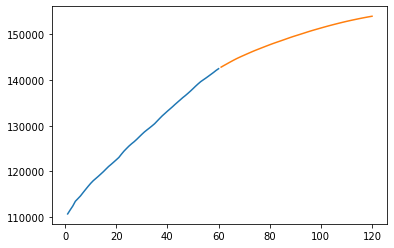

In [37]:
plt.plot(day_new,scaler.inverse_transform(df1[-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [38]:
df3=df1.tolist()
df3.extend(lst_output)

In [39]:
df3=scaler.inverse_transform(df3).tolist()

In [40]:
df3=pd.DataFrame(df3,columns=['Total Deaths'])

In [41]:
df3['Date'] = pd.date_range(start='30/1/2020', periods=len(df3), freq='D')


In [42]:
df3['Total Deaths']=df3['Total Deaths'].astype('int64')

### Plotting Predicted and The Data We Have
 Orange showing the predictions for Next 180 days and Blue Showing the Data We Have Got till 12/12/2020

In [43]:
from matplotlib import dates as mpl_dates
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
df3['st']=df3['Date'].dt.strftime("%d/%m/%Y")

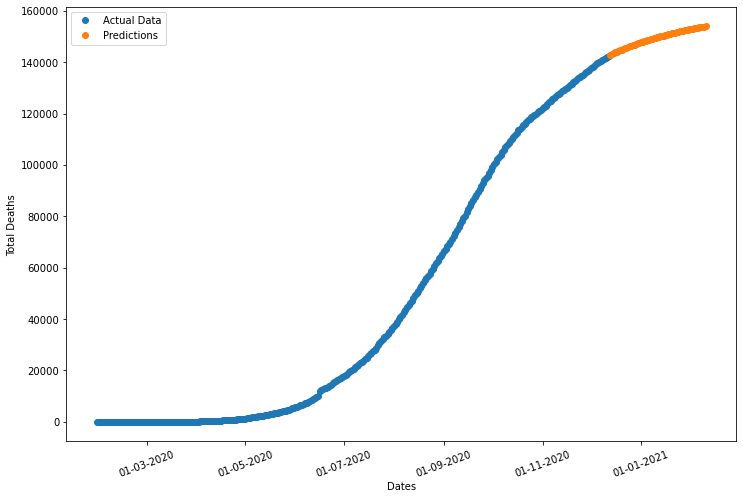

In [44]:
plt.figure(figsize=(12,8))
plt.plot_date(x=df3['Date'][:df.shape[0]],y=df3['Total Deaths'][:df.shape[0]])
plt.plot_date(x=df3['Date'][df.shape[0]:],y=df3['Total Deaths'][df.shape[0]:])
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=20)
plt.ylabel('Total Deaths')
plt.xlabel('Dates')
plt.legend(['Actual Data', 'Predictions'])

In [45]:
df3.tail()

,Total Deaths,Date,st
373,153517,2021-02-06,06/02/2021
374,153626,2021-02-07,07/02/2021
375,153730,2021-02-08,08/02/2021
376,153831,2021-02-09,09/02/2021
377,153929,2021-02-10,10/02/2021


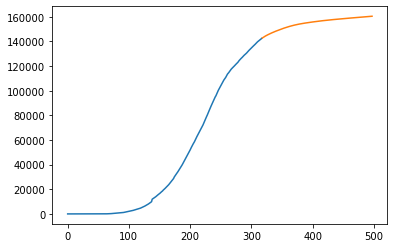

In [52]:
plt.plot(df3[:df.shape[0]])
plt.plot(df3[df.shape[0]:])

In [128]:
df3

,Total Deaths,Date
0,0,2020-01-30
1,0,2020-01-31
2,0,2020-02-01
3,0,2020-02-02
4,0,2020-02-03
...,...,...
493,160234,2021-06-06
494,160274,2021-06-07
495,160315,2021-06-08
496,160356,2021-06-09


In [129]:
df3[df3['Date']=='24-01-2021']['Total Deaths']

360    151823
Name: Total Deaths, dtype: int64